# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import datetime to convert Unix timestamps
from datetime import datetime

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # Add units to convert temp measurements from Kelvin to Farenheit
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | amga
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | aswan
Processing Record 8 of Set 1 | keren
Processing Record 9 of Set 1 | forster
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | buga
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | ust'-ordynskiy
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | prudentopolis
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | mermoz boabab
Processing Record 18 of Set 1 | broken hill
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | messaad
Processing Record 21 of Set 1 | amos
Processi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,14.06,51,40,12.35,CL,1734030959
1,edinburgh of the seven seas,-37.0676,-12.3116,15.67,88,100,9.14,SH,1734030960
2,bilibino,68.0546,166.4372,-18.01,94,100,1.59,RU,1734030961
3,amga,60.8953,131.9608,-30.53,99,100,0.02,RU,1734030962
4,ilulissat,69.2167,-51.1000,-18.08,82,83,4.28,GL,1734030963


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,14.06,51,40,12.35,CL,1734030959
1,edinburgh of the seven seas,-37.0676,-12.3116,15.67,88,100,9.14,SH,1734030960
2,bilibino,68.0546,166.4372,-18.01,94,100,1.59,RU,1734030961
3,amga,60.8953,131.9608,-30.53,99,100,0.02,RU,1734030962
4,ilulissat,69.2167,-51.1000,-18.08,82,83,4.28,GL,1734030963


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

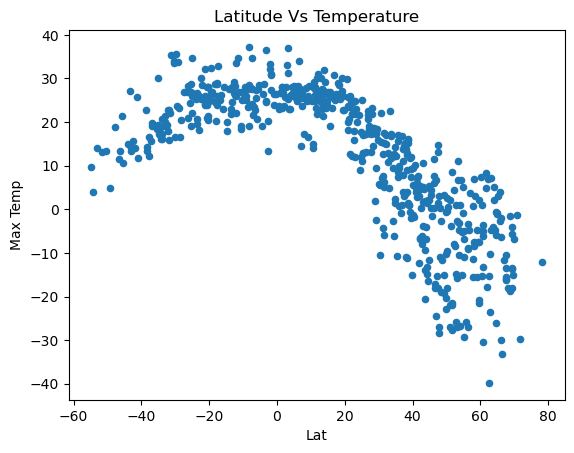

In [9]:
city_data_df.columns
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat", y="Max Temp", title = "Latitude Vs Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

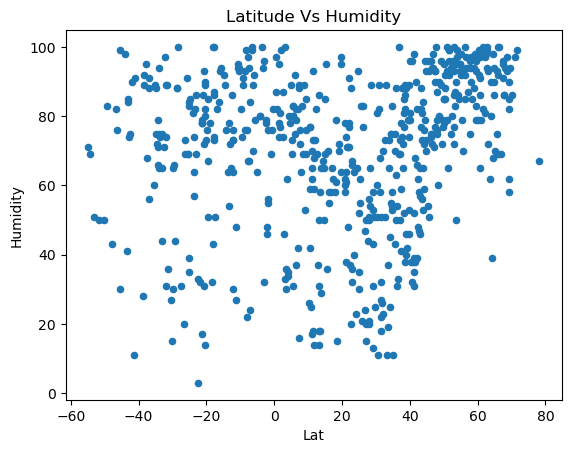

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity", title = "Latitude Vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

KeyError: 'Clouds (Numberic)'

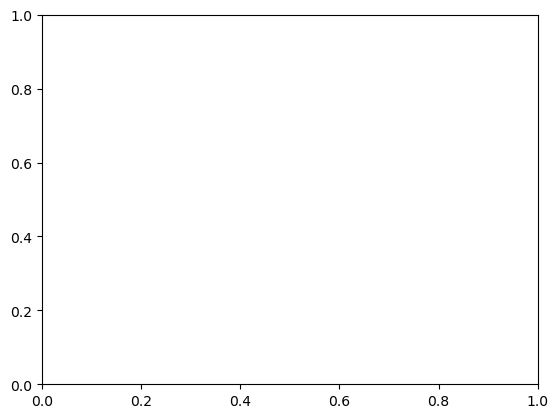

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Clouds (Numberic)", title = "Latitude Vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

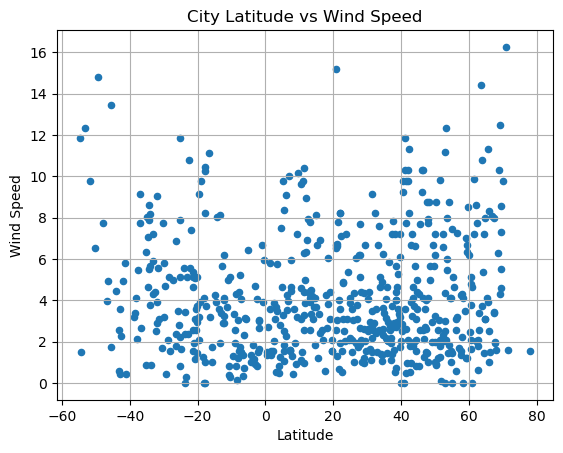

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x="Lat", y="Wind Speed", title = "Latitude Vs Wind Speed")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lineregress(x,y):
    slope, intercept, rvalue, p_value, std_err =linregress(x, y)   
    plt.plot(x, [intercept + slope*val for val in x], 'r')
    print(f"The R-squared is: {rvalue}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bilibino,68.0546,166.4372,-18.01,94,100,1.59,RU,1734030961
3,amga,60.8953,131.9608,-30.53,99,100,0.02,RU,1734030962
4,ilulissat,69.2167,-51.1000,-18.08,82,83,4.28,GL,1734030963
5,aswan,24.0934,32.9070,21.61,23,0,3.09,EG,1734030873
6,keren,15.7778,38.4581,19.03,70,0,3.35,ER,1734030966


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,14.06,51,40,12.35,CL,1734030959
1,edinburgh of the seven seas,-37.0676,-12.3116,15.67,88,100,9.14,SH,1734030960
7,forster,-32.1667,152.5167,17.99,97,13,2.50,AU,1734030967
8,port alfred,-33.5906,26.8910,20.66,74,100,0.89,ZA,1734030968
10,port-aux-francais,-49.3500,70.2167,4.79,83,76,14.82,TF,1734030970


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Max Temp")
plt.savefig("output_data/Fig5.png")

NameError: name 'plot_linear_regression' is not defined

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Max Temp")
plt.savefig("output_data/Fig6.png")

NameError: name 'plot_linear_regression' is not defined

**Discussion about the linear relationship: There is a strong negative coorelation between latitude and max temperaure in the northern hemisphere and a moderate to strong correlation in the sourthern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Humidity")
plt.savefig("output_data/Fig7.png")

NameError: name 'plot_linear_regression' is not defined

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Humidity")
plt.savefig("output_data/Fig8.png")

NameError: name 'plot_linear_regression' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Clouds (Numberic)")
plt.savefig("output_data/Fig9.png")

NameError: name 'plot_linear_regression' is not defined

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Clouds (Numberic)")
plt.savefig("output_data/Fig10.png")

NameError: name 'plot_linear_regression' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed")
plt.savefig("output_data/Fig11.png")

NameError: name 'plot_linear_regression' is not defined

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed")
plt.savefig("output_data/Fig12.png")

NameError: name 'plot_linear_regression' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE